# Sentiment Analysis of President Trump's Tweets

### The following work is divided into two phases: the first is the analysis of a dataset of all Donald Trump's tweets; the second is mainly concerned with visualisation. For the analysis, I tried to perform a sentimental analysis using the NRC Emotional Lexicon, a list of English words in which each term is associated with an emotion. The intention is to understand how many tweets contain a feeling of anger and to see if there is a readable trend. 

### We start exploring the NRC Emotional Lexicon dataset with Pandas.

In [2]:
#Import the library
import pandas as pd
!pip install session-info


  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 63 kB 836 kB/s            
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8045 sha256=afc9c6c69d26c64430b0823904e22a7bd944233e36fdd57d93b64f124e5b054a
  Stored in directory: /Users/macssd/Library/Caches/pip/wheels/d4/fc/2e/00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session-info
You should consider upgrading via the '/Users/macssd/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
filepath = "/Users/macssd/Desktop/NRCEMOTION.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df.head(12)

,word,emotion,association
0,abacus,sadness,0
1,abacus,surprise,0
2,abacus,trust,1
3,abandon,anger,0
4,abandon,anticipation,0
5,abandon,disgust,0
6,abandon,fear,1
7,abandon,joy,0
8,abandon,negative,1
9,abandon,positive,0


In [5]:
#check whether only 8 emotions are counted and which ones.
emolex_df.emotion.unique()

array(['sadness', 'surprise', 'trust', 'anger', 'anticipation', 'disgust',
       'fear', 'joy', 'negative', 'positive'], dtype=object)

In [6]:
#how many terms are associated with each emotion
emolex_df.emotion.value_counts()

sadness         14181
surprise        14181
trust           14181
anger           14180
anticipation    14180
disgust         14180
fear            14180
joy             14180
negative        14180
positive        14180
Name: emotion, dtype: int64

In [7]:
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [8]:
#Words associated with the feeling of anger
emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'anger')].word

13          abandoned
23        abandonment
153             abhor
163         abhorrent
253           abolish
             ...     
141203       wrongful
141213        wrongly
141453           yell
141483           yelp
141623          youth
Name: word, Length: 1247, dtype: object

In [9]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abacus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
1,abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
emolex_words[emolex_words.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
2,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
16,abhor,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17,abhorrent,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
26,abolish,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
emolex_words[(emolex_words.joy == 1) & (emolex_words.negative == 1)].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
60,abundance,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1017,balm,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1381,boisterous,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1915,celebrity,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2003,charmed,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [12]:
# Angry words
emolex_words[emolex_words.anger == 1].word

2          abandoned
3        abandonment
16             abhor
17         abhorrent
26           abolish
            ...     
14121       wrongful
14122        wrongly
14146           yell
14149           yelp
14163          youth
Name: word, Length: 1247, dtype: object

### We import my two datasets, which contain all of Trump's tweets from 2009 to the day the account was disabled. (Source: Github repository: https://github.com/MarkHershey/CompleteTrumpTweetsArchive)


In [13]:
#We import them and join them
df1=pd.read_csv("/Users/macssd/Desktop/Beforeoffice.csv", on_bad_lines='skip')
df2=pd.read_csv("/Users/macssd/Desktop/Inoffice.csv",on_bad_lines='skip')
frames = [df1, df2]
tweets_df= pd.concat(frames)
tweets_df

,ID,Time,Tweet URL,Tweet Text
0,@realDonaldTrump,2009-05-04 13:54,https://twitter.com/realDonaldTrump/status/16...,"""Be sure to tune in and watch Donald Trump on..."
1,@realDonaldTrump,2009-05-04 20:00,https://twitter.com/realDonaldTrump/status/17...,"""Donald Trump will be appearing on The View t..."
2,@realDonaldTrump,2009-05-08 08:38,https://twitter.com/realDonaldTrump/status/17...,"""Donald Trump reads Top Ten Financial Tips on..."
3,@realDonaldTrump,2009-05-08 15:40,https://twitter.com/realDonaldTrump/status/17...,"""New Blog Post: Celebrity Apprentice Finale a..."
4,@realDonaldTrump,2009-05-12 09:07,https://twitter.com/realDonaldTrump/status/17...,"""'My persona will never be that of a wallflow..."
...,...,...,...,...
10679,@realDonaldTrump,2021-01-06 22:16,https://twitter.com/realDonaldTrump/status/13...,"""Even Mexico uses Voter I.D."""
10680,@realDonaldTrump,2021-01-06 23:44,https://twitter.com/realDonaldTrump/status/13...,"""These scoundrels are only toying with the @s..."
10681,@realDonaldTrump,2021-01-07 03:38,https://twitter.com/realDonaldTrump/status/13...,"""Please support our Capitol Police and Law En..."
10682,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,"""https://t.co/Pm2PKV0Fp3"""


In [14]:
##I check the size of each one to see how many tweets were written during his presidential term.
print(df1.shape) #before election
print(df2.shape) #after election

(21668, 4)
(10684, 4)


In [15]:
#I rename the columns
tweets_df.columns = ['id', 'time', 'url', 'content']

In [16]:
#I clean the dataset
tweets_df.content = tweets_df.content.str.replace("[^A-Za-z ]", " ")

/var/folders/fh/_2867v4d1mx36r2g_cs_6g940000gp/T/ipykernel_33519/4114336799.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df.content = tweets_df.content.str.replace("[^A-Za-z ]", " ")


In [17]:
tweets_df

,id,time,url,content
0,@realDonaldTrump,2009-05-04 13:54,https://twitter.com/realDonaldTrump/status/16...,Be sure to tune in and watch Donald Trump on...
1,@realDonaldTrump,2009-05-04 20:00,https://twitter.com/realDonaldTrump/status/17...,Donald Trump will be appearing on The View t...
2,@realDonaldTrump,2009-05-08 08:38,https://twitter.com/realDonaldTrump/status/17...,Donald Trump reads Top Ten Financial Tips on...
3,@realDonaldTrump,2009-05-08 15:40,https://twitter.com/realDonaldTrump/status/17...,New Blog Post Celebrity Apprentice Finale a...
4,@realDonaldTrump,2009-05-12 09:07,https://twitter.com/realDonaldTrump/status/17...,My persona will never be that of a wallflow...
...,...,...,...,...
10679,@realDonaldTrump,2021-01-06 22:16,https://twitter.com/realDonaldTrump/status/13...,Even Mexico uses Voter I D
10680,@realDonaldTrump,2021-01-06 23:44,https://twitter.com/realDonaldTrump/status/13...,These scoundrels are only toying with the s...
10681,@realDonaldTrump,2021-01-07 03:38,https://twitter.com/realDonaldTrump/status/13...,Please support our Capitol Police and Law En...
10682,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,https t co Pm PKV Fp


### Using Machine Learning techniques, I begin to vectorize only the words that are within the NRC from Trump's tweets

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_words.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(tweets_df.content)
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,abbreviation,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Get your list of angry words
angry_words = emolex_words[emolex_words.anger == 1]['word']
angry_words.head()

2       abandoned
3     abandonment
16          abhor
17      abhorrent
26        abolish
Name: word, dtype: object

In [20]:
# Only give me the columns of angry words
tweets_df['anger'] = wordcount_df[angry_words].sum(axis=1)
tweets_df.head(3)

,id,time,url,content,anger
0,@realDonaldTrump,2009-05-04 13:54,https://twitter.com/realDonaldTrump/status/16...,Be sure to tune in and watch Donald Trump on...,0.000000
1,@realDonaldTrump,2009-05-04 20:00,https://twitter.com/realDonaldTrump/status/17...,Donald Trump will be appearing on The View t...,0.111111
2,@realDonaldTrump,2009-05-08 08:38,https://twitter.com/realDonaldTrump/status/17...,Donald Trump reads Top Ten Financial Tips on...,0.000000


In [21]:
tweets_df = tweets_df.drop(columns=['id', 'url'])
tweets_df.head()

,time,content,anger
0,2009-05-04 13:54,Be sure to tune in and watch Donald Trump on...,0.000000
1,2009-05-04 20:00,Donald Trump will be appearing on The View t...,0.111111
2,2009-05-08 08:38,Donald Trump reads Top Ten Financial Tips on...,0.000000
3,2009-05-08 15:40,New Blog Post Celebrity Apprentice Finale a...,0.200000
4,2009-05-12 09:07,My persona will never be that of a wallflow...,0.000000


In [22]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32352 entries, 0 to 10683
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     32352 non-null  object 
 1   content  32352 non-null  object 
 2   anger    32352 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1011.0+ KB


In [23]:
tweets_df['time']= pd.to_datetime(tweets_df['time'])
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32352 entries, 0 to 10683
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     32352 non-null  datetime64[ns]
 1   content  32352 non-null  object        
 2   anger    32352 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1011.0+ KB


In [24]:
#I create a column with just the year
import datetime
tweets_df['year'] = tweets_df['time'].dt.year

In [25]:
#tweets with angry connotation
newtweets=tweets_df[tweets_df.anger > 0]
newtweets

,time,content,anger,year
1,2009-05-04 20:00:00,Donald Trump will be appearing on The View t...,0.111111,2009
3,2009-05-08 15:40:00,New Blog Post Celebrity Apprentice Finale a...,0.200000,2009
15,2009-05-26 09:42:00,Your higher self is in direct opposition to...,0.200000,2009
24,2009-06-24 17:09:00,Donald Trump s commercial free WWE Raw doe...,0.250000,2009
25,2009-06-26 11:51:00,RE Michael Jackson He was a great friend ...,0.400000,2009
...,...,...,...,...
10656,2021-01-04 13:44:00,https t co PXNO lpoZ,0.500000,2021
10666,2021-01-06 02:14:00,RT Perduesenate The Trump family is right ...,1.000000,2021
10671,2021-01-06 13:08:00,Just happened to have found another bal...,0.250000,2021
10672,2021-01-06 13:16:00,RT TomiLahren The steal is in the making i...,0.333333,2021


In [26]:
#I create a Pivot Table in which I count the occurrences of tweets distributed over the years.

import numpy as np
newtweets.pivot_table(index=["year"],values=["anger"],aggfunc=np.count_nonzero)

,anger
year,
2009,7
2010,9
2011,169
2012,754
2013,1062
2014,820
2015,1116
2016,597
2017,338


In [27]:
#I store it in the variable "example"
example=newtweets.pivot_table(index=["year"],values=["anger"],aggfunc=np.count_nonzero)
example

,anger
year,
2009,7
2010,9
2011,169
2012,754
2013,1062
2014,820
2015,1116
2016,597
2017,338


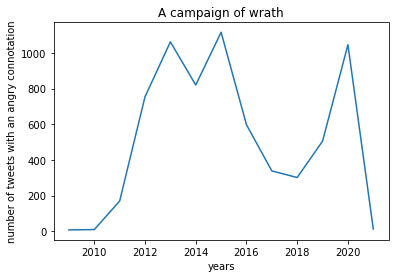

In [28]:
#I display the graph to see their distribution over the years.

import matplotlib.pyplot as plt
plt.plot(example['anger'])
plt.title('A campaign of wrath')
plt.xlabel('years')
plt.ylabel('number of tweets with an angry connotation')
plt.show()

### What emerges from a first analysis is that tweets with angry connotations are mainly distributed over two periods: 2012 to 2016 and 2019 to 2020. During his presidential term, the tones are more moderate, but they escalate as he approaches his second presidential run. Therefore, I try to select only the tweets going from 2017.

In [29]:
example1=newtweets[newtweets.year>2016]

In [30]:
#number of tweets with angry connotation during the time as President
example1.shape

(2202, 4)

In [31]:
tweets=example1.pivot_table(index=["year"],values=["anger"],aggfunc=np.count_nonzero)
tweets

,anger
year,
2017,338
2018,301
2019,505
2020,1046
2021,12


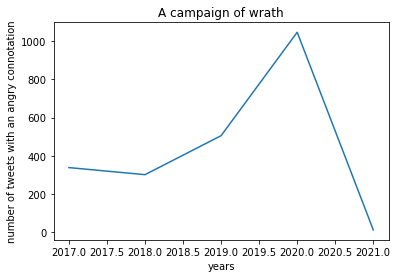

In [32]:
plt.plot(tweets['anger'])
plt.title('A campaign of wrath')
plt.xlabel('years')
plt.ylabel('number of tweets with an angry connotation')
plt.show()

In [33]:
#Insert an additional column in which I also distribute the occurrences for each month.
example1['month_year'] = example1['time'].dt.to_period('M')

/var/folders/fh/_2867v4d1mx36r2g_cs_6g940000gp/T/ipykernel_33519/1893505599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example1['month_year'] = example1['time'].dt.to_period('M')


In [34]:
example1.head()

,time,content,anger,year,month_year
21611,2017-01-04 07:10:00,FoxNews Julian Assange on U S media co...,0.666667,2017,2017-01
21613,2017-01-04 07:27:00,Somebody hacked the DNC but why did they not...,1.000000,2017,2017-01
21614,2017-01-04 08:26:00,massive increases of ObamaCare will take pla...,0.125000,2017,2017-01
21618,2017-01-05 18:24:00,How did NBC get an exclusive look into the ...,0.200000,2017,2017-01
21624,2017-01-06 13:30:00,Monitoring the terrible situation in Florida...,0.142857,2017,2017-01


In [35]:
#Definitive dataset
tweetsdef=example1.pivot_table(index=["month_year"],values=["anger"],aggfunc=np.count_nonzero)


In [103]:
tweetsdef

,anger
month_year,
2017-01,25
2017-02,9
2017-03,19
2017-04,27
2017-05,21
2017-06,29
2017-07,39
2017-08,18
2017-09,52


In [104]:
#I save it
tweetsdef.to_csv("/Users/macssd/Desktop/DAV_21110444/tweets.csv")

### Topic models with Gensim. I do a further analysis to see what the topics and themes of Trump's tweets are, and assess whether anything interesting emerges.

In [36]:
speeches_df= pd.concat(frames)

In [37]:
speeches_df

,ID,Time,Tweet URL,Tweet Text
0,@realDonaldTrump,2009-05-04 13:54,https://twitter.com/realDonaldTrump/status/16...,"""Be sure to tune in and watch Donald Trump on..."
1,@realDonaldTrump,2009-05-04 20:00,https://twitter.com/realDonaldTrump/status/17...,"""Donald Trump will be appearing on The View t..."
2,@realDonaldTrump,2009-05-08 08:38,https://twitter.com/realDonaldTrump/status/17...,"""Donald Trump reads Top Ten Financial Tips on..."
3,@realDonaldTrump,2009-05-08 15:40,https://twitter.com/realDonaldTrump/status/17...,"""New Blog Post: Celebrity Apprentice Finale a..."
4,@realDonaldTrump,2009-05-12 09:07,https://twitter.com/realDonaldTrump/status/17...,"""'My persona will never be that of a wallflow..."
...,...,...,...,...
10679,@realDonaldTrump,2021-01-06 22:16,https://twitter.com/realDonaldTrump/status/13...,"""Even Mexico uses Voter I.D."""
10680,@realDonaldTrump,2021-01-06 23:44,https://twitter.com/realDonaldTrump/status/13...,"""These scoundrels are only toying with the @s..."
10681,@realDonaldTrump,2021-01-07 03:38,https://twitter.com/realDonaldTrump/status/13...,"""Please support our Capitol Police and Law En..."
10682,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,"""https://t.co/Pm2PKV0Fp3"""


In [38]:
speeches_df.columns = ['id', 'time', 'url', 'content']

In [39]:
#I clean my dataset

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
speeches_df.content = speeches_df.content.str.replace("[^A-Za-z ]", " ")
stop = stopwords.words('english')
speeches_df['content1'] = speeches_df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macssd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/fh/_2867v4d1mx36r2g_cs_6g940000gp/T/ipykernel_33519/3077958795.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  speeches_df.content = speeches_df.content.str.replace("[^A-Za-z ]", " ")


In [40]:
speeches_df

,id,time,url,content,content1
0,@realDonaldTrump,2009-05-04 13:54,https://twitter.com/realDonaldTrump/status/16...,Be sure to tune in and watch Donald Trump on...,Be sure tune watch Donald Trump Late Night Dav...
1,@realDonaldTrump,2009-05-04 20:00,https://twitter.com/realDonaldTrump/status/17...,Donald Trump will be appearing on The View t...,Donald Trump appearing The View tomorrow morni...
2,@realDonaldTrump,2009-05-08 08:38,https://twitter.com/realDonaldTrump/status/17...,Donald Trump reads Top Ten Financial Tips on...,Donald Trump reads Top Ten Financial Tips Late...
3,@realDonaldTrump,2009-05-08 15:40,https://twitter.com/realDonaldTrump/status/17...,New Blog Post Celebrity Apprentice Finale a...,New Blog Post Celebrity Apprentice Finale Less...
4,@realDonaldTrump,2009-05-12 09:07,https://twitter.com/realDonaldTrump/status/17...,My persona will never be that of a wallflow...,My persona never wallflower I rather build wal...
...,...,...,...,...,...
10679,@realDonaldTrump,2021-01-06 22:16,https://twitter.com/realDonaldTrump/status/13...,Even Mexico uses Voter I D,Even Mexico uses Voter I D
10680,@realDonaldTrump,2021-01-06 23:44,https://twitter.com/realDonaldTrump/status/13...,These scoundrels are only toying with the s...,These scoundrels toying sendavidperdue great g...
10681,@realDonaldTrump,2021-01-07 03:38,https://twitter.com/realDonaldTrump/status/13...,Please support our Capitol Police and Law En...,Please support Capitol Police Law Enforcement ...
10682,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,https t co Pm PKV Fp,https co Pm PKV Fp


In [41]:
# I delete tweets that only contain references to other links
speeches_df=speeches_df[speeches_df[ 'content1' ].str.contains( 'http | run | com |pic' )==False ]

In [42]:
speeches_df

,id,time,url,content,content1
0,@realDonaldTrump,2009-05-04 13:54,https://twitter.com/realDonaldTrump/status/16...,Be sure to tune in and watch Donald Trump on...,Be sure tune watch Donald Trump Late Night Dav...
1,@realDonaldTrump,2009-05-04 20:00,https://twitter.com/realDonaldTrump/status/17...,Donald Trump will be appearing on The View t...,Donald Trump appearing The View tomorrow morni...
4,@realDonaldTrump,2009-05-12 09:07,https://twitter.com/realDonaldTrump/status/17...,My persona will never be that of a wallflow...,My persona never wallflower I rather build wal...
5,@realDonaldTrump,2009-05-12 14:21,https://twitter.com/realDonaldTrump/status/17...,Miss USA Tara Conner will not be fired I ...,Miss USA Tara Conner fired I always believer s...
21,@realDonaldTrump,2009-06-15 18:13,https://twitter.com/realDonaldTrump/status/21...,Thanks to all for your thoughtful birthday w...,Thanks thoughtful birthday wishes Donald Trump
...,...,...,...,...,...
10679,@realDonaldTrump,2021-01-06 22:16,https://twitter.com/realDonaldTrump/status/13...,Even Mexico uses Voter I D,Even Mexico uses Voter I D
10680,@realDonaldTrump,2021-01-06 23:44,https://twitter.com/realDonaldTrump/status/13...,These scoundrels are only toying with the s...,These scoundrels toying sendavidperdue great g...
10681,@realDonaldTrump,2021-01-07 03:38,https://twitter.com/realDonaldTrump/status/13...,Please support our Capitol Police and Law En...,Please support Capitol Police Law Enforcement ...
10682,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,https t co Pm PKV Fp,https co Pm PKV Fp


In [43]:
from gensim.utils import simple_preprocess

texts = speeches_df.content1.apply(simple_preprocess)


In [44]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(14642 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...)
adding document #20000 to Dictionary(26490 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...)
built Dictionary(35554 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...) from 26331 documents (total 291638 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(35554 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...) from 26331 documents (total 291638 corpus positions)", 'datetime': '2022-05-02T19:26:30.524077', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
discarding 29668 tokens: [('cling', 1), ('persona', 3), ('wallflower', 1), ('conner', 1), ('tara', 2), ('thoughtful', 1), ('entertainer', 2), ('bountiful', 1), ('gaga', 3), ('demographic', 4)]...
keeping 5886 t

In [45]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
PROGRESS: processing document #20000
TfidfModel lifecycle event {'msg': 'calculated IDF weights for 26331 documents and 5886 features (243455 matrix non-zeros)', 'datetime': '2022-05-02T19:26:32.980051', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [46]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

using serial LSI version on this node
updating model with new documents
preparing a new chunk of documents
using 100 extra samples and 2 power iterations
1st phase: constructing (5886, 115) action matrix
orthonormalizing (5886, 115) action matrix
2nd phase: running dense svd on (115, 20000) matrix
computing the final decomposition
keeping 15 factors (discarding 57.301% of energy spectrum)
processed documents up to #20000
topic #0(21.591): 0.990*"thanks" + 0.069*"realdonaldtrump" + 0.056*"great" + 0.038*"trump" + 0.033*"true" + 0.028*"president" + 0.027*"luck" + 0.027*"good" + 0.020*"donald" + 0.019*"love"
topic #1(16.101): -0.499*"thank" + -0.430*"co" + -0.429*"https" + -0.289*"realdonaldtrump" + -0.233*"great" + -0.212*"trump" + -0.167*"president" + -0.098*"america" + 0.097*"thanks" + -0.089*"you"
topic #2(14.448): 0.543*"co" + 0.540*"https" + -0.311*"realdonaldtrump" + -0.234*"trump" + -0.226*"thank" + -0.188*"great" + -0.185*"president" + -0.099*"donald" + -0.080*"you" + -0.073*"ame

In [67]:
lsi_model.print_topics()

[(0,
  '0.702*"co" + 0.698*"https" + 0.088*"rt" + 0.066*"thank" + 0.039*"realdonaldtrump" + 0.029*"great" + 0.017*"president" + 0.016*"whitehouse" + 0.016*"you" + 0.015*"maga"'),
 (1,
  '0.988*"thanks" + 0.075*"realdonaldtrump" + 0.062*"great" + 0.041*"trump" + 0.035*"true" + 0.033*"president" + 0.028*"good" + 0.027*"luck" + 0.023*"thank" + 0.021*"donald"'),
 (2,
  '0.751*"thank" + 0.302*"realdonaldtrump" + 0.234*"great" + 0.204*"trump" + 0.182*"president" + 0.140*"you" + -0.111*"thanks" + 0.105*"america" + 0.093*"rt" + 0.089*"make"'),
 (3,
  '-0.640*"thank" + 0.341*"realdonaldtrump" + 0.292*"great" + 0.239*"trump" + 0.237*"president" + 0.160*"america" + 0.155*"rt" + 0.139*"make" + 0.115*"again" + 0.101*"the"'),
 (4,
  '-0.685*"great" + 0.306*"realdonaldtrump" + -0.293*"again" + 0.289*"president" + -0.275*"america" + -0.263*"make" + 0.231*"trump" + 0.143*"rt" + 0.089*"donald" + 0.055*"vote"'),
 (5,
  '0.934*"true" + 0.155*"so" + -0.132*"president" + -0.110*"america" + -0.099*"again" + 

In [47]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.702352,co,0
1,0.698129,https,0
2,0.088379,rt,0
3,0.065634,thank,0
4,0.039429,realdonaldtrump,0


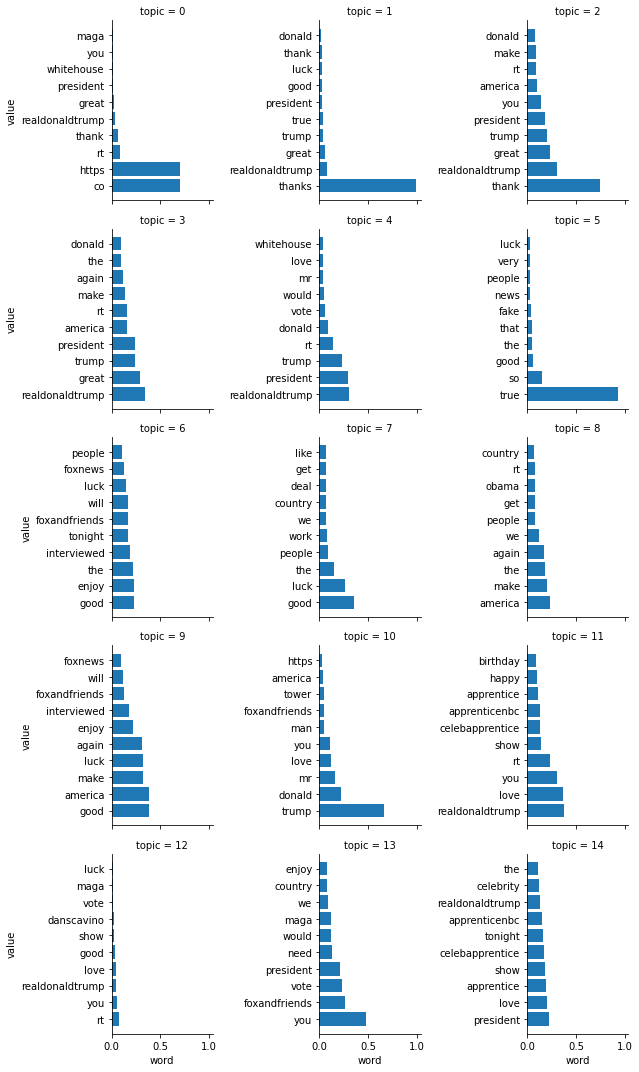

In [48]:
#using seaborn in matplotlib to display topic distribution
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [49]:
from gensim.utils import simple_preprocess

texts = speeches_df.content1.apply(simple_preprocess)

In [50]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(14642 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...)
adding document #20000 to Dictionary(26490 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...)
built Dictionary(35554 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...) from 26331 documents (total 291638 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(35554 unique tokens: ['be', 'david', 'donald', 'late', 'letterman']...) from 26331 documents (total 291638 corpus positions)", 'datetime': '2022-05-02T19:26:48.340428', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
discarding 33554 tokens: [('presents', 11), ('ten', 15), ('appearing', 8), ('cling', 1), ('persona', 3), ('wallflower', 1), ('walls', 7), ('believer', 5), ('chances', 8), ('conner', 1)]...
keeping 2000 tokens w

In [51]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

no word id mapping provided; initializing from corpus, assuming identity
using symmetric alpha at 0.06666666666666667
using symmetric eta at 0.06666666666666667
using serial LDA version on this node
running online (single-pass) LDA training, 15 topics, 1 passes over the supplied corpus of 26331 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
PROGRESS: pass 0, at document #2000/26331
merging changes from 2000 documents into a model of 26331 documents
topic #1 (0.067): 0.045*"304" + 0.029*"39" + 0.021*"21" + 0.018*"140" + 0.013*"982" + 0.010*"232" + 0.010*"274" + 0.009*"41" + 0.008*"36" + 0.007*"411"
topic #8 (0.067): 0.027*"232" + 0.017*"21" + 0.012*"982" + 0.010*"41" + 0.010*"411" + 0.010*"140" + 0.010*"304" + 0.009*"158" + 0.009*"40" + 0.008*"135"
topic #2 (0.067): 0.014*"225" + 0.013*"232" + 0.013*"304" + 0.011*"982" + 0.011*"21" + 0.011*"11" + 0.011*"80" + 0.011*"411" + 0.011*"18

In [73]:
lda_model.print_topics()

[(0,
  '0.038*"539" + 0.034*"161" + 0.034*"1086" + 0.026*"20" + 0.023*"27" + 0.019*"404" + 0.016*"1162" + 0.014*"1062" + 0.013*"81" + 0.013*"1204"'),
 (1,
  '0.060*"1550" + 0.053*"36" + 0.046*"1562" + 0.042*"381" + 0.039*"258" + 0.030*"983" + 0.029*"484" + 0.026*"1348" + 0.024*"254" + 0.018*"1312"'),
 (2,
  '0.048*"947" + 0.032*"492" + 0.028*"21" + 0.027*"1259" + 0.022*"226" + 0.015*"926" + 0.015*"39" + 0.015*"612" + 0.015*"195" + 0.015*"140"'),
 (3,
  '0.076*"271" + 0.053*"1328" + 0.049*"21" + 0.049*"1376" + 0.025*"419" + 0.018*"512" + 0.017*"1098" + 0.017*"47" + 0.015*"893" + 0.015*"1069"'),
 (4,
  '0.048*"140" + 0.045*"1950" + 0.043*"286" + 0.029*"21" + 0.023*"428" + 0.022*"128" + 0.021*"411" + 0.020*"118" + 0.020*"795" + 0.018*"111"'),
 (5,
  '0.193*"1036" + 0.171*"1562" + 0.096*"529" + 0.048*"10" + 0.031*"39" + 0.010*"74" + 0.010*"274" + 0.009*"251" + 0.008*"1053" + 0.008*"1126"'),
 (6,
  '0.238*"1074" + 0.043*"227" + 0.029*"1552" + 0.016*"229" + 0.016*"1477" + 0.013*"699" + 0.012

In [74]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

/Users/macssd/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/macssd/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macssd/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macssd/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/macssd/opt/anaconda3/lib/python

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.259150  0.090015       1        1  11.664219
8     -0.083114 -0.361544       2        1  11.153758
2      0.114395  0.019871       3        1   8.044175
7      0.129436  0.033660       4        1   7.115930
4      0.175343 -0.047370       5        1   6.818605
12     0.101106 -0.101426       6        1   6.504939
14    -0.225167 -0.149103       7        1   6.293769
10    -0.270305  0.118448       8        1   5.884388
0      0.033311  0.025627       9        1   5.853347
3      0.063282 -0.000504      10        1   5.797965
9     -0.013273  0.068881      11        1   5.480800
11     0.097773  0.043397      12        1   5.278895
13     0.083294  0.052652      13        1   5.165903
6      0.110272  0.041683      14        1   4.819187
1     -0.057203  0.165713      15        1   4.124119, topic_info=                 Term          Freq         Total Category  logprob  loglift
1832            https   8545.000000   8545.000000  Default  30.0000  30.0000
1419               co   9747.000000   9747.000000  Default  29.0000  29.0000
1036               rt  10042.000000  10042.000000  Default  28.0000  28.0000
1562  realdonaldtrump   5415.000000   5415.000000  Default  27.0000  27.0000
1074            thank   2469.000000   2469.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
1103   administration     99.101053    291.158598  Topic15  -4.4927   2.1106
39              great    161.950846   2453.848401  Topic15  -4.0015   0.4702
40                 he     95.909484    694.285933  Topic15  -4.5254   1.2088
486              nice     69.418011    144.879622  Topic15  -4.8487   2.4526
18               like     80.543720    680.340540  Topic15  -4.7000   1.0545

[874 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
883      10  0.987861         abc
1056     10  0.910089  absolutely
1056     14  0.070916  absolutely
1181     13  0.990747       abuse
1621      1  0.952629      access
...     ...       ...         ...
1294     10  0.009300        your
1294     12  0.232495        your
1294     14  0.065099        your
1294     15  0.678886        your
675       5  0.976934        zero

[2344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 3, 8, 5, 13, 15, 11, 1, 4, 10, 12, 14, 7, 2])

## Nothing particularly interesting was found. I therefore proceed to make the final changes to the dataset I downloaded on Google Sheets (tweets.xlsl https://docs.google.com/spreadsheets/d/1ikvdzE-uYmI1HcBG8BWR2naoZ5ClwKhvMGFe1nT2t3k/edit?usp=sharing) and complete the display on Datawrapper(https://www.datawrapper.de/_/wRD2W/)

In [52]:
import session_info
session_info.show()